Throughout this report I will be analyzing videogame sales in order to determine optimal strategies for marketing campaigns. In my conclusion I will state which strategies will sell the most videogames for my online store Ice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.columns = data.columns.str.lower()

In [6]:
data['user_score'].replace('tbd', 11, inplace = True)

In [7]:
data['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [8]:
data['user_score'].value_counts()

11     2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
1.5       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [9]:
data.dropna(inplace = True, axis = 0, subset = ['name'])
data.dropna(inplace = True, axis = 0, subset = ['year_of_release'])

In [10]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [11]:
data['user_score'].fillna(11, inplace = True)

In [12]:
data['critic_score'].fillna(101, inplace = True)

In [13]:
data['rating'].fillna('Z', inplace = True)

In [14]:
data.isna().sum() 

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [15]:
data['user_score'] = pd.to_numeric(data['user_score'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


For data preprocessing, I deleted all the rows that had missing values for name, year of release, and genre. These values are ok to be deleted as they constitute a very small portion of the data. The remainder of the missing values are in critic score, user score, and ratings. These all constitute a large portion of the data so they cannot all be deleted without skewing the data quite a lot. Therefore, I replaced these missing values with illogical values (ie. a rating of 11 on a scale of 1-10) and when it is time to analyze that data, I will use a filter to filter out all of the illogical values.

In [17]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,101.0,11.0,Z
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,101.0,11.0,Z
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,101.0,11.0,Z
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,101.0,11.0,Z
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,101.0,11.0,Z
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,101.0,11.0,Z


In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['other_sales'] + data['other_sales']

In [19]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,87.22
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,101.0,11.0,Z,34.20
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.02
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.44
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,101.0,11.0,Z,22.16
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,101.0,11.0,Z,0.00
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,101.0,11.0,Z,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,101.0,11.0,Z,0.00
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,101.0,11.0,Z,0.01


In [20]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [21]:
yearly_sales = data.pivot_table(
    index = 'year_of_release', values = 'platform', aggfunc = 'count')

In [22]:
yearly_sales

,platform
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


In [23]:
yearly_sales['platform'].sum()

16444

<AxesSubplot:xlabel='year_of_release'>

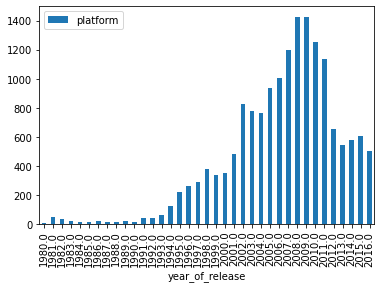

In [24]:
# Videogame sales per year
yearly_sales.plot(kind='bar')

This graph shows that the number of games being made increased until 2008 and then started to decrease.

In [25]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [26]:
platform_sales = data.pivot_table(
    index = 'platform', values = 'total_sales', aggfunc = 'sum')
platform_sales.sort_values(by = ['total_sales'], inplace = True)
platform_sales

,total_sales
platform,
3DO,0.00
WS,0.00
TG16,0.00
GG,0.00
NG,0.00
PCFX,0.00
SAT,1.40
SCD,1.46
DC,7.66


<AxesSubplot:xlabel='platform'>

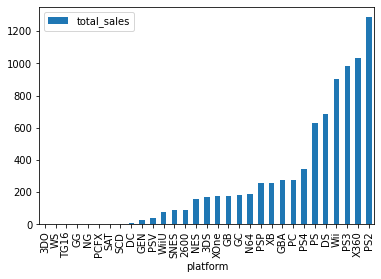

In [27]:
platform_sales.plot(kind='bar')

Consoles with the greatest total sales are PS2, X360, and ps3.

<AxesSubplot:xlabel='year_of_release'>

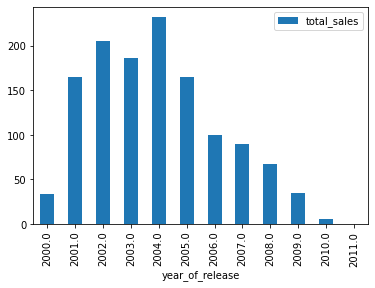

In [28]:
ps2 = data.query('platform == "PS2"')
ps2_pivot = ps2.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
ps2_pivot.plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

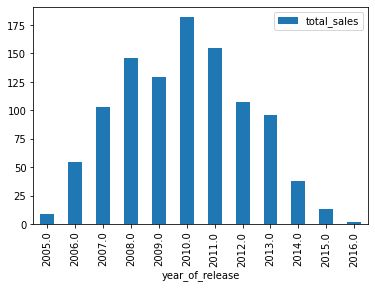

In [29]:
x360 = data.query('platform == "X360"')
x360_pivot = x360.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
x360_pivot.plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

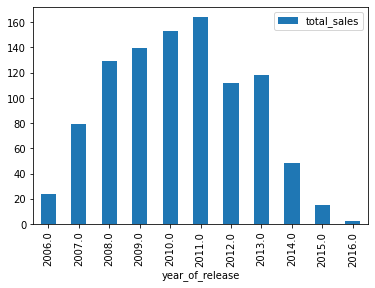

In [30]:
ps3 = data.query('platform == "PS3"')
ps3_pivot = ps3.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
ps3_pivot.plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

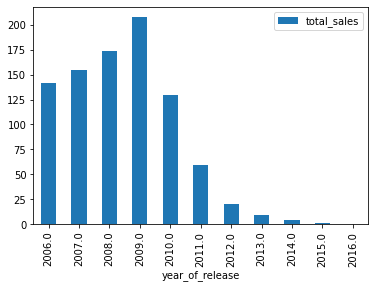

In [31]:
wii = data.query('platform == "Wii"')
wii_pivot = wii.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
wii_pivot.plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

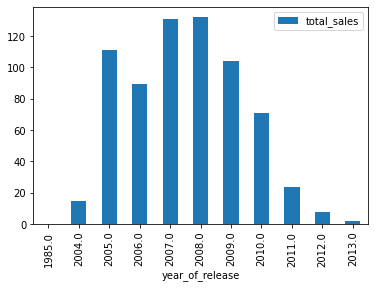

In [32]:
ds = data.query('platform == "DS"')
ds_pivot = ds.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
ds_pivot.plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

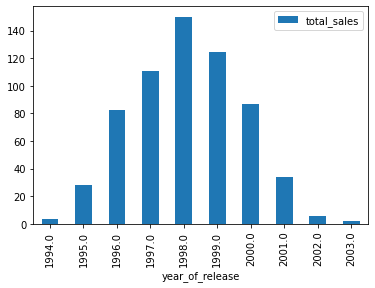

In [33]:
ps = data.query('platform == "PS"')
ps_pivot = ps.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
ps_pivot.plot(kind = 'bar')

In [34]:
pop_systems = ps_pivot.join(ds_pivot, lsuffix = '_PS', rsuffix = '_DS', how ='outer')
pop_systems = pop_systems.join(wii_pivot, rsuffix = '_Wii', how = 'outer')
pop_systems = pop_systems.join(ps3_pivot, rsuffix = '_PS3', how = 'outer')
pop_systems = pop_systems.join(x360_pivot, rsuffix = '_X360', how = 'outer')
pop_systems = pop_systems.join(ps2_pivot, rsuffix = '_PS2', how = 'outer')
pop_systems.fillna(0, inplace = True)
pop_systems.rename({'total_sales': 'total_sales_Wii'}, axis=1, inplace=True)
pop_systems

,total_sales_PS,total_sales_DS,total_sales_Wii,total_sales_PS3,total_sales_X360,total_sales_PS2
year_of_release,,,,,,
1985.0,0.00,0.00,0.00,0.00,0.00,0.00
1994.0,3.76,0.00,0.00,0.00,0.00,0.00
1995.0,28.38,0.00,0.00,0.00,0.00,0.00
1996.0,82.42,0.00,0.00,0.00,0.00,0.00
1997.0,110.94,0.00,0.00,0.00,0.00,0.00
1998.0,150.06,0.00,0.00,0.00,0.00,0.00
1999.0,124.38,0.00,0.00,0.00,0.00,0.00
2000.0,87.05,0.00,0.00,0.00,0.00,33.88
2001.0,33.90,0.00,0.00,0.00,0.00,165.42


In [35]:
pop_systems.rename({'total_sales': 'total_sales_Wii'}, axis=1, inplace=True)

<AxesSubplot:xlabel='year_of_release'>

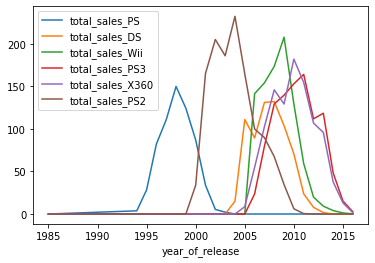

In [36]:
pop_systems.plot(kind = 'line')

The top 6 most selling consoles were selected. The top 6 is used because after the 6th highest selling console (PS) the value dropped significantly (from 631 to 346, or 45% decrease) to the 7th highest selling console (PS4). As evident by this data, a console will typically sell games for about 10 years. However, the best sales typically occur for 7 years before significantly dropping (falling lower than 50).

In [37]:
ps4 = data.query('platform == "PS4"')
ps4_pivot = ps4.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

In [38]:
pc = data.query('platform == "PC"')
pc_pivot = pc.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

In [39]:
gba = data.query('platform == "GBA"')
gba_pivot = gba.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

In [40]:
xb = data.query('platform == "XB"')
xb_pivot = xb.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

In [41]:
psp = data.query('platform == "PSP"')
psp_pivot = psp.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

In [42]:
n64 = data.query('platform == "N64"')
n64_pivot = n64.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

In [43]:
gc = data.query('platform == "GC"')
gc_pivot = gc.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

In [44]:
gb = data.query('platform == "GB"')
gb_pivot = gb.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

In [45]:
xone = data.query('platform == "XOne"')
xone_pivot = xone.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

In [46]:
threeds = data.query('platform == "3DS"')
threeds_pivot = threeds.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

In [47]:
nes = data.query('platform == "NES"')
nes_pivot = nes.pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

In [48]:
systems = pop_systems.join(ps4_pivot, rsuffix = '_PS4', how ='outer')
systems = systems.join(pc_pivot, rsuffix = '_PC', how ='outer')
systems = systems.join(gba_pivot, rsuffix = '_GBA', how ='outer')
systems = systems.join(xb_pivot, rsuffix = '_XB', how ='outer')
systems = systems.join(psp_pivot, rsuffix = '_PSP', how ='outer')
systems = systems.join(n64_pivot, rsuffix = '_N64', how ='outer')
systems = systems.join(gc_pivot, rsuffix = '_GC', how ='outer')
systems = systems.join(gb_pivot, rsuffix = '_GB', how ='outer')
systems = systems.join(xone_pivot, rsuffix = '_xone', how ='outer')
systems = systems.join(threeds_pivot, rsuffix = '_3DS', how ='outer')
systems = systems.join(nes_pivot, rsuffix = '_NES', how ='outer')

In [49]:
systems.rename({'total_sales': 'total_sales_PS4'}, axis=1, inplace=True)

In [50]:
systems

,total_sales_PS,total_sales_DS,total_sales_Wii,total_sales_PS3,total_sales_X360,total_sales_PS2,total_sales_PS4,total_sales_PC,total_sales_GBA,total_sales_XB,total_sales_PSP,total_sales_N64,total_sales_GC,total_sales_GB,total_sales_xone,total_sales_3DS,total_sales_NES
year_of_release,,,,,,,,,,,,,,,,,
1983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.94
1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.51
1985.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.81
1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.53
1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.32
1988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,1.11,NaN,NaN,30.54
1989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.21,NaN,NaN,5.74
1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.99,NaN,NaN,8.11
1991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.27,NaN,NaN,3.67


<AxesSubplot:xlabel='year_of_release'>

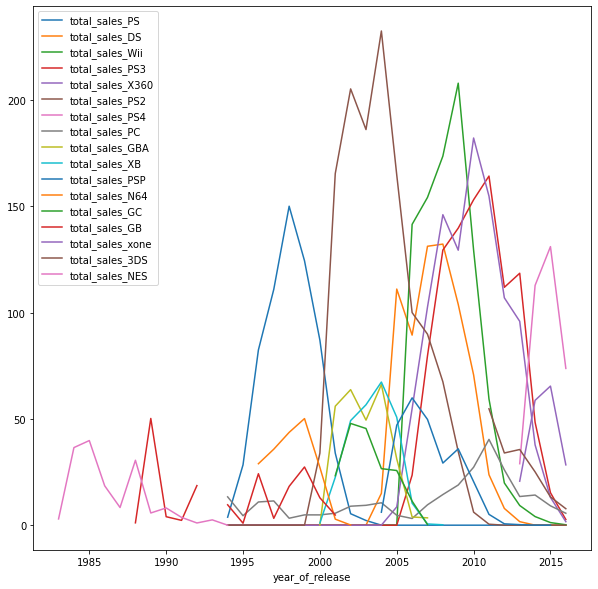

In [51]:
systems.plot(kind = 'line', figsize = (10,10))

The remainder of the consoles with non-negligible amounts of sales were added to this plot in order to determine what are the most successful consoles of 2016. It appears that the data for 2016 is incomplete as there are not as many data points as previous years. Based on the data available, consoles that are seeing a decline in sales are Xbox 360, PS3, and Wii. the consoles that are most successful and are currently growing in sales are PS4 and Xbox One. For this report Xbox One and PS4 will be analyzed as the most profitable game systems and data from 2013-2015 will be considered.

In [52]:
data_new = data.loc[data['year_of_release'] >= 2013]
data_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,24.03
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,17.62
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,101.0,11.0,Z,16.65
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,101.0,11.0,Z,11.03
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,14.21
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,101.0,11.0,Z,0.00
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,101.0,11.0,Z,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,101.0,11.0,Z,0.00
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,101.0,11.0,Z,0.00


In [53]:
data_new['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

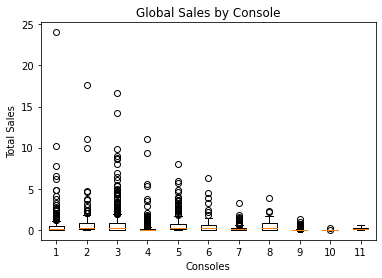

In [54]:
ds_sales = data_new.loc[data['platform'] == 'DS']['total_sales']
wii_sales = data_new.loc[data['platform'] == 'Wii']['total_sales']
ps3_sales = data_new.loc[data['platform'] == 'PS3']['total_sales']
x360_sales = data_new.loc[data['platform'] == 'X360']['total_sales']
ps4_sales = data_new.loc[data['platform'] == 'PS4']['total_sales']
pc_sales = data_new.loc[data['platform'] == 'PC']['total_sales']
psp_sales = data_new.loc[data['platform'] == 'PSP']['total_sales']
xone_sales = data_new.loc[data['platform'] == 'XOne']['total_sales']
threeds_sales = data_new.loc[data['platform'] == '3DS']['total_sales']
wiiu_sales = data_new.loc[data['platform'] == 'WiiU']['total_sales']
psv_sales = data_new.loc[data['platform'] == 'PSV']['total_sales']
console_sales = [ps3_sales, x360_sales,
                 ps4_sales, threeds_sales, xone_sales, wiiu_sales, pc_sales, 
                 wii_sales, psv_sales, psp_sales, ds_sales]
plt.boxplot(console_sales)
plt.ylabel('Total Sales')
plt.xlabel('Consoles')
plt.title('Global Sales by Console')
plt.show()

In [55]:
ps3_sales

16       24.03
69       10.23
126       7.76
149       6.57
180       6.14
         ...  
16558     0.01
16638     0.01
16674     0.01
16691     0.00
16710     0.00
Name: total_sales, Length: 345, dtype: float64

Sales vary greatly amongst consoles in terms of total games sold. The averages tend to be low for each console due to there being so many games that have had low sales.

In [56]:
ps4_user = ps4.query('user_score != 11')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

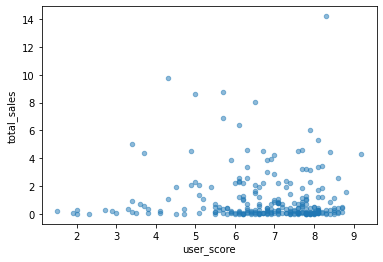

In [57]:
ps4_user.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', alpha = 0.5)

In [58]:
#Correlation coefficient for total sales against user score
ps4_user['total_sales'].corr(ps4_user['user_score'])

-0.03942520113572384

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

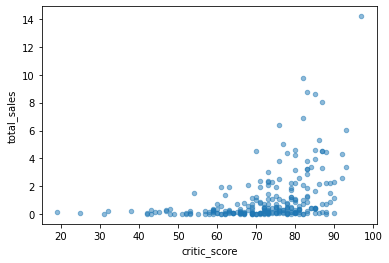

In [98]:
ps4_critic = ps4.query('critic_score != 101')
ps4_critic.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', alpha = 0.5)

In [99]:
#Correlation coefficient for total sales against critic score
ps4_user['total_sales'].corr(ps4_user['critic_score'])

0.33597652989066373

There does not seem to be a correlation between total sales and user scores but there is a weak correlation between total sales and critic scores.

In [61]:
ps4_piv_2 = ps4.pivot_table(index = 'name', values = 'total_sales', aggfunc = 'sum')
ps4_piv_2

,total_sales
name,
7 Days to Die,0.16
Adventure Time: Finn & Jake Investigations,0.12
Aegis of Earth: Protonovus Assault,0.02
Agatha Christie's The ABC Murders,0.02
Akiba's Trip: Undead & Undressed,0.12
...,...
Yakuza: Ishin,0.00
Yoru no Nai Kuni,0.00
ZombiU,0.06


In [62]:
xone_piv_2 = xone.pivot_table(index = 'name', values = 'total_sales', aggfunc = 'sum')
xone_piv_2

,total_sales
name,
7 Days to Die,0.05
Adventure Time: Finn & Jake Investigations,0.05
Agatha Christie's The ABC Murders,0.01
Alien: Isolation,0.54
Angry Birds Star Wars,0.19
...,...
XCOM 2,0.04
ZombiU,0.01
Zombie Army Trilogy,0.12


In [63]:
pc_piv_2 = pc.pivot_table(index = 'name', values = 'total_sales', aggfunc = 'sum')
pc_piv_2

,total_sales
name,
007: Quantum of Solace,0.02
15 Days,0.01
1701 A.D.,0.33
18 Wheels of Steel: Extreme Trucker,0.02
18 Wheels of Steel: Extreme Trucker 2,0.12
...,...
Zoo Tycoon 2,0.07
Zoo Tycoon 2: Ultimate Collection,0.30
Zoo Tycoon: Complete Collection,0.07


In [64]:
console_vs = ps4_piv_2.join(xone_piv_2, lsuffix = '_ps4', rsuffix = '_xbox_one', how ='inner')
console_vs

,total_sales_ps4,total_sales_xbox_one
name,,
7 Days to Die,0.16,0.05
Adventure Time: Finn & Jake Investigations,0.12,0.05
Agatha Christie's The ABC Murders,0.02,0.01
Alien: Isolation,1.25,0.54
Angry Birds Star Wars,0.26,0.19
...,...,...
Wolfenstein: The Old Blood,0.47,0.16
Worms: WMD,0.03,0.01
XCOM 2,0.16,0.04


In [65]:
console_vs = console_vs.join(pc_piv_2, rsuffix = '_pc', how = 'left')
console_vs

,total_sales_ps4,total_sales_xbox_one,total_sales
name,,,
7 Days to Die,0.16,0.05,NaN
Adventure Time: Finn & Jake Investigations,0.12,0.05,NaN
Agatha Christie's The ABC Murders,0.02,0.01,NaN
Alien: Isolation,1.25,0.54,0.16
Angry Birds Star Wars,0.26,0.19,NaN
...,...,...,...
Wolfenstein: The Old Blood,0.47,0.16,0.08
Worms: WMD,0.03,0.01,NaN
XCOM 2,0.16,0.04,0.25


In [66]:
console_vs.rename({'total_sales': 'total_sales_pc'}, axis=1, inplace=True)

<AxesSubplot:xlabel='name'>

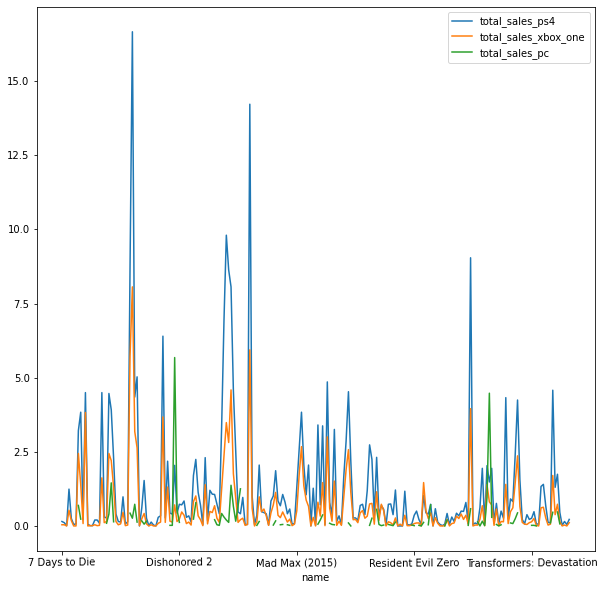

In [67]:
console_vs.plot(kind = 'line', figsize = (10, 10), rot = 0.5)

In [68]:
console_vs

,total_sales_ps4,total_sales_xbox_one,total_sales_pc
name,,,
7 Days to Die,0.16,0.05,NaN
Adventure Time: Finn & Jake Investigations,0.12,0.05,NaN
Agatha Christie's The ABC Murders,0.02,0.01,NaN
Alien: Isolation,1.25,0.54,0.16
Angry Birds Star Wars,0.26,0.19,NaN
...,...,...,...
Wolfenstein: The Old Blood,0.47,0.16,0.08
Worms: WMD,0.03,0.01,NaN
XCOM 2,0.16,0.04,0.25


In [69]:
console_vs.query('total_sales_ps4 >= total_sales_ps4 and total_sales_pc')

,total_sales_ps4,total_sales_xbox_one,total_sales_pc
name,,,
Alien: Isolation,1.25,0.54,0.16
Assassin's Creed IV: Black Flag,3.22,2.45,0.70
Assassin's Creed Syndicate,3.84,1.40,0.24
Assassin's Creed: Unity,4.50,3.83,0.59
Batman: Arkham Knight,4.50,1.63,0.14
...,...,...,...
Wasteland 2,0.12,0.07,0.11
Watch Dogs,4.58,1.71,0.47
Wolfenstein: The New Order,1.75,0.74,0.48


In [70]:
console_vs.query('total_sales_pc >= total_sales_ps4 and total_sales_xbox_one')

,total_sales_ps4,total_sales_xbox_one,total_sales_pc
name,,,
Dead Rising 2,0.01,0.01,0.14
Diablo III,2.05,0.72,5.68
Dishonored,0.44,0.16,0.57
Farming Simulator 17,0.48,0.13,0.69
Farming Simulator 2015,0.42,0.22,1.26
Terraria,0.07,0.04,0.15
The Elder Scrolls V: Skyrim,1.49,0.82,4.48
XCOM 2,0.16,0.04,0.25


In [71]:
console_vs.query('total_sales_xbox_one >= total_sales_ps4 and total_sales_pc')

,total_sales_ps4,total_sales_xbox_one,total_sales_pc
name,,,
Dead Rising 2,0.01,0.01,0.14
Plants vs. Zombies: Garden Warfare,0.70,0.74,0.02
Rise of the Tomb Raider,1.04,1.47,0.13


As is evident in this graphic, PS4 games consistently outsell their counterparts of the same name on all comparable consoles. There are several games where Xbox One has the leading sales however these numbers are fairly close and few so they can be considered as outliers. Although PC typically does not see many sales compared to these other two consoles there are also several games where PC has leading sales. I hypothesize that this is because these games might be better played with a mouse/keyboard instead of with a traditional controller.

In [72]:
data_new['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

<AxesSubplot:xlabel='genre'>

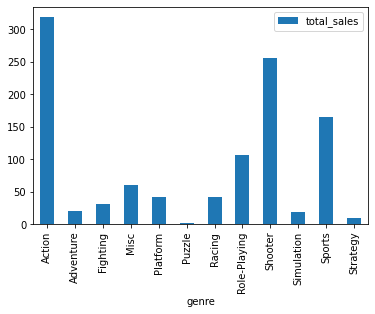

In [73]:
data_genre_total = data_new.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
data_genre_total.plot(kind = 'bar')

<AxesSubplot:xlabel='genre'>

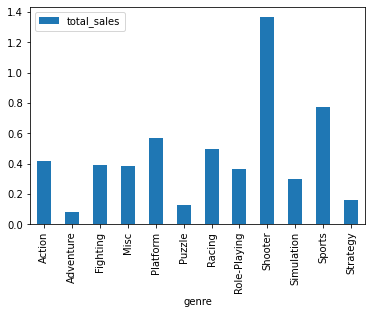

In [74]:
data_genre_avg = data_new.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean')
data_genre_avg.plot(kind = 'bar')

<AxesSubplot:xlabel='genre'>

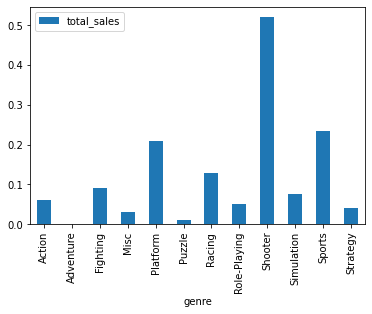

In [75]:
data_genre_med = data_new.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median')
data_genre_med.plot(kind = 'bar')

Total sales per genre were calculated out using several metrics: total, mean, and median. The total sales show that action games are the highest selling by a large margin. However, for mean and median per genre, platform, shooter, sports, and racing games are also very profitable. Platform and action games are most likely popular because they have the most history in the videogame world. Platformers such as Mario and Donkey Kong helped popularize video games in general. In terms of the other popular genres, they are all popular to be played online with friends. Online gameplay has become much more popular in recent years. The least profitable games are strategy, role-playing, puzzle and adventure games. All of these genres tend to be slower moving.

In [76]:
eu_genre_total = data_new.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
na_genre_total = data_new.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
jp_genre_total = data_new.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')

In [77]:
eu_genre_total.sort_values(by = 'eu_sales', ascending = False)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [78]:
na_genre_total.sort_values(by = 'na_sales', ascending = False)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [79]:
jp_genre_total.sort_values(by = 'jp_sales', ascending = False)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


In [80]:
genre_region_total = eu_genre_total.join(na_genre_total, lsuffix = '_eu', rsuffix = '_na', how = 'inner')
genre_region_total = genre_region_total.join(jp_genre_total, rsuffix = '_na', how = 'inner')
genre_region_total

,eu_sales,na_sales,jp_sales
genre,,,
Action,118.13,126.05,40.49
Adventure,8.25,7.14,5.82
Fighting,8.55,15.55,7.65
Misc,20.04,27.49,9.20
Platform,15.58,18.14,4.79
Puzzle,1.00,0.83,1.18
Racing,20.19,12.96,2.30
Role-Playing,36.97,46.40,51.04
Shooter,87.86,109.74,6.61


<AxesSubplot:xlabel='genre'>

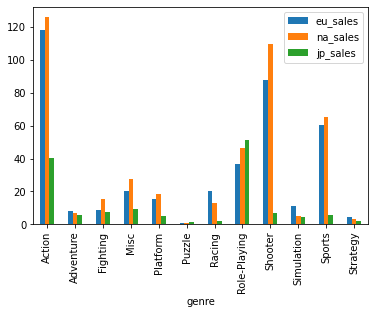

In [81]:
genre_region_total.plot(kind = 'bar')

In [82]:
eu_genre_mean = data_new.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'mean')
na_genre_mean = data_new.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'mean')
jp_genre_mean = data_new.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'mean')

In [83]:
genre_region_mean = eu_genre_mean.join(na_genre_mean, lsuffix = '_eu', rsuffix = '_na', how = 'inner')
genre_region_mean = genre_region_mean.join(jp_genre_mean, rsuffix = '_na', how = 'inner')
genre_region_mean

,eu_sales,na_sales,jp_sales
genre,,,
Action,0.154217,0.164556,0.052859
Adventure,0.033673,0.029143,0.023755
Fighting,0.106875,0.194375,0.095625
Misc,0.129290,0.177355,0.059355
Platform,0.210541,0.245135,0.064730
Puzzle,0.058824,0.048824,0.069412
Racing,0.237529,0.152471,0.027059
Role-Playing,0.126610,0.158904,0.174795
Shooter,0.469840,0.586845,0.035348


<AxesSubplot:xlabel='genre'>

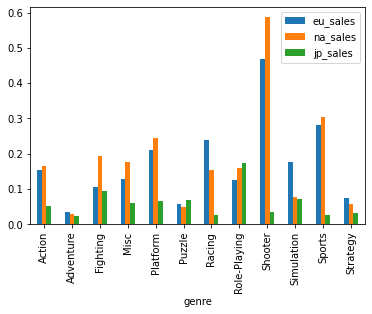

In [84]:
genre_region_mean.plot(kind = 'bar')

In [85]:
eu_platform_mean = data_new.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'mean')
na_platform_mean = data_new.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'mean')
jp_platform_mean = data_new.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'mean')

In [86]:
eu_platform_mean.sort_values(by = 'eu_sales', ascending = False)

,eu_sales
platform,
PS4,0.359923
Wii,0.257826
X360,0.228602
XOne,0.208866
PS3,0.196551
WiiU,0.172609
PC,0.134180
DS,0.106250
3DS,0.102178


In [87]:
na_platform_mean.sort_values(by = 'na_sales', ascending = False)

,na_sales
platform,
X360,0.439032
XOne,0.377004
Wii,0.285217
PS4,0.277398
WiiU,0.254000
PS3,0.184058
3DS,0.126073
DS,0.071250
PC,0.058783


In [88]:
jp_platform_mean.sort_values(by = 'jp_sales', ascending = False)

,jp_sales
platform,
3DS,0.223795
WiiU,0.094609
PS3,0.067681
PSV,0.051927
PSP,0.049104
PS4,0.040714
X360,0.002742
Wii,0.002174
XOne,0.001377


In [89]:
platform_region_mean = eu_platform_mean.join(na_platform_mean, lsuffix = '_eu', rsuffix = '_na', how = 'inner')
platform_region_mean = platform_region_mean.join(jp_platform_mean, rsuffix = '_na', how = 'inner')
platform_region_mean

,eu_sales,na_sales,jp_sales
platform,,,
3DS,0.102178,0.126073,0.223795
DS,0.106250,0.071250,0.000000
PC,0.134180,0.058783,0.000000
PS3,0.196551,0.184058,0.067681
PS4,0.359923,0.277398,0.040714
PSP,0.002537,0.000000,0.049104
PSV,0.017039,0.014078,0.051927
Wii,0.257826,0.285217,0.002174
WiiU,0.172609,0.254000,0.094609


<AxesSubplot:xlabel='platform'>

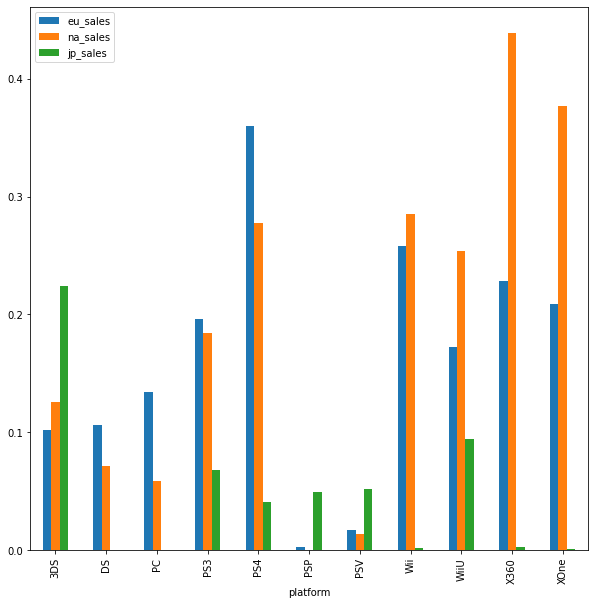

In [90]:
platform_region_mean.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='rating'>

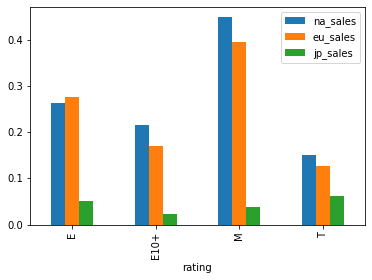

In [100]:
data_esrb = data_new.query('rating != "Z"')
esrb_na = data_esrb.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'mean')
esrb_eu = data_esrb.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'mean')
esrb_jp = data_esrb.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'mean')
esrb = esrb_na.join(esrb_eu, lsuffix = '_na', rsuffix = '_eu', how = 'outer')
esrb = esrb.join(esrb_jp, rsuffix = '_jp', how = 'outer')
esrb.plot(kind = 'bar')

Top genres in Europe in order are: action, shooter, sports, role-playing, and racing. For North America: action, shooter, sports, role-playing, miscellaneous. For Japan: role-playing, action, miscellaneous, fighting, then shooter. North America and Europe have very similar tastes. Japan favors role-playing the most as that genre has historically been very popular there. Some of the most popular role playing games such as Final Fantasy originated in Japan.

Top selling platforms in Europe in order are: PS4, Wii, Xbox 360, Xbox One, and PS3. For North America: Xbox 360, Xbox One, Wii, PS4, and Wii U. For Japan: 3DS, Wii U, PS3, PS Vita, PSP. For the majority of consoles, Europe and North America have the leading sales. This is due to the fact that Europe and North America have much higher populations than Japan. However, for the 3DS Japan has considerably higher sales than the other regions. This indicates that hand-held gaming has a much higher market value in Japan than either of the other regions. North America's top consoles are Xbox consoles due to the fact that Microsoft is an American company. 

In terms of ratings, Mature rated games are the most popular in North America and Europe while Teen games and Everyone games are more popular in Japan. This indicates that the average gamer in Japan is younger than in either of the other regions.

Null hypothesis = Average user ratings of the Xbox One and PC platforms are the same.

Alternative hypothesis = Average user ratings of the Xbox One and PC platforms are not the same.

In [92]:
xone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    float64
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     247 non-null    float64
 9   user_score       247 non-null    float64
 10  rating           247 non-null    object 
 11  total_sales      247 non-null    float64
dtypes: float64(8), object(4)
memory usage: 25.1+ KB


Null hypothesis = Average user ratings for the Action and Sports genres are the same.

Alternative hypothesis = Average user ratings for the Action and Sports genres are not the same.

In [93]:
sample_xone = xone['user_score']
sample_pc = pc['user_score']

alpha = 0.05
results = st.ttest_ind(sample_xone, sample_pc)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.20042453495257723
We can't reject the null hypothesis


In [94]:
action = data_new.query('genre == "Action"')
sports = data_new.query('genre == "Sports"')
action = action.query('user_score != "tbd"')
sports = sports.query('user_score != "tbd"')
action.dropna(inplace = True)
sports.dropna(inplace = True)
action['user_score'] = pd.to_numeric(action['user_score'])
sports['user_score'] = pd.to_numeric(sports['user_score'])

In [95]:
sample_action = action['user_score']
sample_pc = pc['user_score']

alpha = 0.05
results_2 = st.ttest_ind(sample_action, sample_pc)

print('p-value: ', results_2.pvalue)

if results_2.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  3.151845214758931e-20
We reject the null hypothesis


The null and alternative hypotheses were formulated in this manner because the null hypothesis must always indicate that values in question are the same. 0.05 was chosen as the alpha value as it is typically the standard alpha value.

Conclusion

In order to craft a purposeful advertising campaign, games should be targeted towards regions where they are most popular. Since PS4 and Xbox One seem to be on upwards trends, we should push them in Europe and North America. Japan does not have high sales for Xbox One so we should push PS4 and 3DS games there. In Europe and North America we should push action and shooter games but in Japan we should push action and role-playing games. We should also target an older audience in Europe and in North America (rated M games) but in Japan we should target younger audiences (rated T and rated E).